In [49]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat

## Define data

In [43]:
with open('position_error_log.csv', 'r', newline='') as error_log:
    reader = csv.reader(error_log)
    header = next(reader)
    
    datadict = {header[i]: [] for i in range(len(header))}
    datadict['Request Number'] = []
    datadict['Cumulative Poses'] = []
    
    datarray = []
    
    request_number, cumulative_poses = 0, 0
    
    for row in reader:
        datarray.append(row)
        
        datadict['Pose Number'].append(int(row[0]))
        
        if int(row[0]) == 1:
            request_number += 1
        
        cumulative_poses += 1
        
        datadict['Request Number'].append(request_number)
        datadict['Cumulative Poses'].append(cumulative_poses)
        
        datadict['EEx err'].append(float(row[1]))
        datadict['EEy err'].append(float(row[2]))
        datadict['EEz err'].append(float(row[3]))
        
        datadict['Abs err'].append(float(row[4]))

In [44]:
for i in range(6):
    print(datarray[i])

['1', '2.753620732764972e-05', '3.1603909253471999e-12', '-2.4239341860354813e-05', '3.6684988862128185e-05']
['2', '2.6851700845931248e-05', '3.6614536031123377e-10', '-2.4995490979451418e-05', '3.6684988861348786e-05']
['3', '2.6146355327938409e-05', '7.3383455334499054e-10', '-2.5732401954137174e-05', '3.668498886196654e-05']
['4', '2.5420691904365356e-05', '1.1031032558613462e-09', '-2.644951473440571e-05', '3.6684988861918e-05']
['5', '2.4675245660965572e-05', '1.4708402075230744e-09', '-2.7146282566725688e-05', '3.6684988861724984e-05']
['6', '2.3910565269513739e-05', '1.8339444585353804e-09', '-2.7822172325331351e-05', '3.6684988861542024e-05']


- Color requests by overall quality?
- Color individual requests by absolute error?

In [45]:
header

['Pose Number', 'EEx err', 'EEy err', 'EEz err', 'Abs err']

<IPython.core.display.Javascript object>


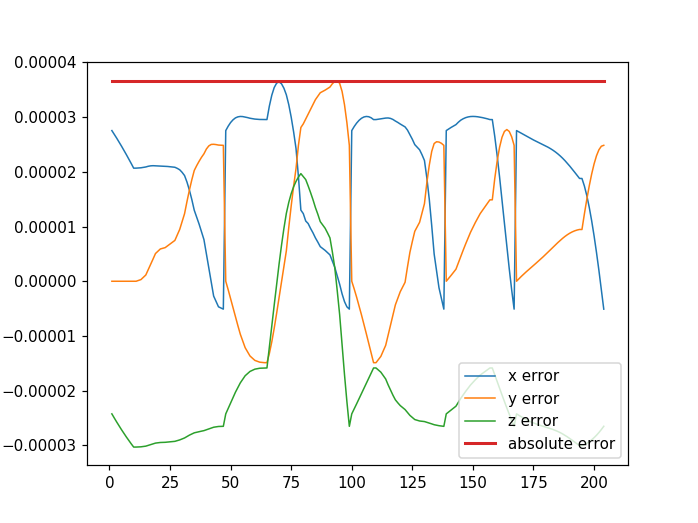

In [46]:
%matplotlib notebook
fig, ax = plt.subplots()
xError, = ax.plot(datadict['Cumulative Poses'], datadict['EEx err'], linewidth=1,
                 label='x error')
# xError.set_dashes(dashes)

yError, = ax.plot(datadict['Cumulative Poses'], datadict['EEy err'], linewidth=1,
                 label='y error')
zError, = ax.plot(datadict['Cumulative Poses'], datadict['EEz err'], linewidth=1,
                 label='z error')
absError, = ax.plot(datadict['Cumulative Poses'], datadict['Abs err'], linewidth=2,
                 label='absolute error')

ax.legend(loc='lower right')
plt.show()

<IPython.core.display.Javascript object>


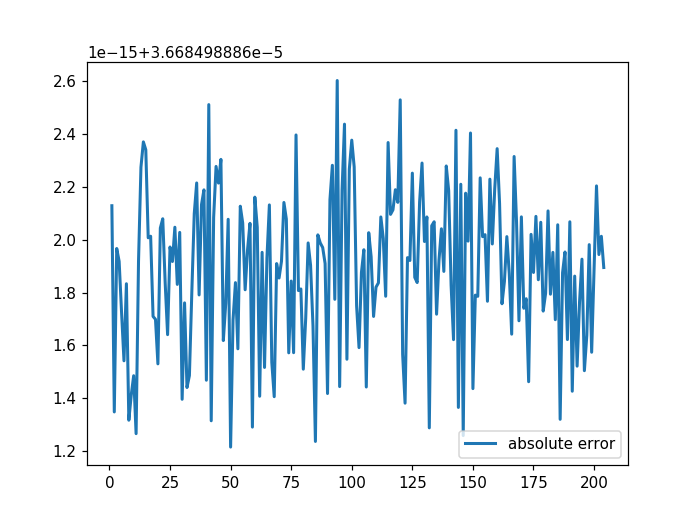

Mean absolute error:  3.668498886188667e-05


In [50]:
%matplotlib notebook
fig, ax = plt.subplots()
# xError, = ax.plot(datadict['Cumulative Poses'], datadict['EEx err'], linewidth=1,
#                  label='x error')
# # xError.set_dashes(dashes)

# yError, = ax.plot(datadict['Cumulative Poses'], datadict['EEy err'], linewidth=1,
#                  label='y error')
# zError, = ax.plot(datadict['Cumulative Poses'], datadict['EEz err'], linewidth=1,
#                  label='z error')
absError, = ax.plot(datadict['Cumulative Poses'], datadict['Abs err'], linewidth=2,
                 label='absolute error')

ax.legend(loc='lower right')
print('Mean absolute error: ', stat.mean(datadict['Abs err']))
plt.show()

In [ ]:
title = ('Calculated IK Solution End Effector Position Error')

# These are the colors that will be used in the plot
plt.
# Offsets for degree labels


# Load the data into a dataframe and us pd.melt to unpivot the degree column
df = pd.DataFrame(datadict)
df = pd.melt(df, var_name='', value_name='conferred')
df['Degree'] = [d.replace('_', ' ').title() for d in df.Degree]

# Define a formatter that works for both bokeh and matplotlib
def percent_format(x):
    try:
        return '{:0.0f}%'.format(x)
    except:
        return '%d%' % x

# Define the value dimensions
value_dim = hv.Dimension('conferred', value_format=percent_format, range=(0, 90))

# Define the dataset
ds = hv.Dataset(df, vdims=[value_dim])
curves = ds.to(hv.Curve, 'year', groupby='Degree').overlay()

# Define a function to get the text annotations
max_year = ds['year'].max()
def get_labels():
     return hv.NdOverlay({deg: hv.Text(max_year, ds[max_year, deg]+y_offsets.get(deg, 0),
                                        deg, halign='left', fontsize=10)(style=dict(color=col))
                            for deg, col in zip(df.Degree.unique(), color_sequence)})

## Display in matplotlib

In [13]:
# # Define a callback to define a custom grid along the y-axis and disabling the (ugly) axis spines
# def cb(plot, element):
#     ax = plot.handles['axis']
#     ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
#     ax.spines['bottom'].set_visible(False)
#     ax.spines['left'].set_visible(False)

# # Define various options to adjust the plot
# options = hv.Store.options(backend='matplotlib')
# options.Curve = hv.Options('plot', show_frame=False, bgcolor='white', labelled=[], show_grid=False,
#                            aspect=0.7, show_legend=False, xticks=5, final_hooks=[cb], fig_size=350)
# options.Curve = hv.Options('style', color=hv.Cycle(values=color_sequence), linewidth=2)

# (curves * get_labels()).relabel(title)

In [29]:
float(2.07502553e-07)

2.07502553e-07

In [30]:
p = '[15]'
list(p)

['[', '1', '5', ']']

In [79]:
t1 = time.strptime(time.ctime())
k = np.sqrt(np.array([[0.2 * i * np.math.lo

time.struct_time(tm_year=2017, tm_mon=9, tm_mday=25, tm_hour=12, tm_min=47, tm_sec=44, tm_wday=0, tm_yday=268, tm_isdst=-1)

In [85]:
%%timeit
def checkError_EE(theta_list, pose):
    sin = np.math.sin
    cos = np.math.cos
    q1n, q2n, q3n, q4n, q5n, q6n = theta_list
    # fk_position is the translation vector from the total homogeneous transform
    # between the base and the end effector; this representation has frame error
    # correction baked in!
    fk_position = np.array([
        [-0.303*(sin(q1n)*sin(q4n) + sin(q2n + q3n)*cos(q1n)*cos(q4n))*sin(q5n) + (1.25*sin(q2n) - 0.054*sin(q2n + q3n) + 1.5*cos(q2n + q3n) + 0.35)*cos(q1n) + 0.303*cos(q1n)*cos(q5n)*cos(q2n + q3n)],
        [-0.303*(sin(q1n)*sin(q2n + q3n)*cos(q4n) - sin(q4n)*cos(q1n))*sin(q5n) + (1.25*sin(q2n) - 0.054*sin(q2n + q3n) + 1.5*cos(q2n + q3n) + 0.35)*sin(q1n) + 0.303*sin(q1n)*cos(q5n)*cos(q2n + q3n)],
        [-0.303*sin(q5n)*cos(q4n)*cos(q2n + q3n) - 0.303*sin(q2n + q3n)*cos(q5n) - 1.5*sin(q2n + q3n) + 1.25*cos(q2n) - 0.054*cos(q2n + q3n) + 0.75]],
        dtype=np.float64)
    pose_target = np.array([[pose.position.x], [pose.position.y], [pose.position.z]])
    error_vect = pose_target - fk_position
    xErr, yErr, zErr = error_vect[0][0], error_vect[1][0], error_vect[2][0]
    absError = np.math.sqrt(error_vect[0][0]**2 + error_vect[1][0]**2 + error_vect[2][0]**2)
    return xErr, yErr, zErr, absError



60.9 ns ± 3.04 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [47]:
j3_radius = np.math.sqrt(0.054**2 + 1.5**2)
j4_correction = np.math.atan2(0.054, 1.50)
print(j3_radius, j4_correction)

1.500971685275908 0.03598446008205159


In [74]:
now = time.clock()
now.strftime("%H:%M:%S")

'12:46:06'

In [68]:
now.strftime